## Sample from ill-conditioned Gaussian potential

We compare Newton Langevin (mirror map = \Sigma^{-1}) with Euler-Maruyama discretization vs. ULA (mirror map = identity). In either case, there is no asymptotic bias but the change of basis helps for speeding up convergence.


In [1]:

import numpy as np
import scipy.misc

# specify potential and parameters
dim = 50
repeat = 100
iteration = 200  # length of each run
x_save = np.zeros((repeat,dim,iteration+1))   
h = 1e-3  # step size

# prox solver and inner step size
inner_iter = 500  
stepsize = 0.5

# potential function: f(x) = (x-mu)'V^{-1}(x-mu)/2
V_inv = np.diag(1.0/np.arange(1,dim+1))
V = np.linalg.inv(V_inv)
mu = np.ones(dim)


In [2]:
# Newton Langevin (mirror map = V_inv)

for j in range(repeat):
    
    x = np.random.normal(0,1,(iteration+1,dim))  # initialize

    for i in range(iteration):

        grad = np.dot(V_inv,(x[i,:] - mu))
        hess = V_inv
        z = np.random.normal(0,1,dim)
        next_y = grad-h*grad+np.sqrt(2*h)*np.dot(scipy.linalg.sqrtm(hess),z)

        solver_x = x[i,:] # initialize       
        # gradient ascent step for finding next x
        for k in range(inner_iter):
            nabla_V_x = np.dot(V_inv,(solver_x-mu))  
            solver_x = solver_x + stepsize*(next_y - nabla_V_x)
                      
        # check norm of gradient
        # norm(next_y-nabla_V_x)
        x[i+1,:] = solver_x
    
    x_save[j,:,:] = x.T  

    
# calculate mean differene and relative covariance error, averaged across
# $repeat$ number of trials
mean_err_newton = np.zeros(iteration)
covariance_err_newton = np.zeros(iteration)

for i in range(iteration):
    estimate_mean = np.mean(x_save[:,:,i])  # size repeat * dim
    mean_err_newton[i] = np.linalg.norm(estimate_mean-mu.T)  
    covariance_err_newton[i] = np.linalg.norm(np.matmul((x_save[:,:,i]-estimate_mean).T,
                                                        (x_save[:,:,i]-estimate_mean))/repeat - V)/np.linalg.norm(V)
                                    

In [3]:
# Same gaussian setup, with mirror map = I (ULA)

h = 1e-3  # step size
x_save = np.zeros((repeat,dim,iteration+1))   

for j in range(repeat):
    
    x = np.random.normal(0,1,(iteration+1,dim))  # initialize

    for i in range(iteration):

        grad = np.dot(V_inv,(x[i,:].T-mu))
        z = np.random.normal(0,1,dim)
        next_y = x[i,:]-h*grad + np.sqrt(2*h)*z
        
        x[i+1,:] = next_y
    
    x_save[j,:,:] = x.T 
    

# calculate mean differene and relative covariance error
mean_err = np.zeros(iteration)
covariance_err = np.zeros(iteration)

for i in range(iteration):
    estimate_mean = np.mean(x_save[:,:,i])  # size repeat * dim
    mean_err[i] = np.linalg.norm(estimate_mean-mu.T)  
    covariance_err[i] = np.linalg.norm(np.matmul((x_save[:,:,i]-estimate_mean).T,
                                                 (x_save[:,:,i]-estimate_mean))/repeat - V)/np.linalg.norm(V)


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Mean error')

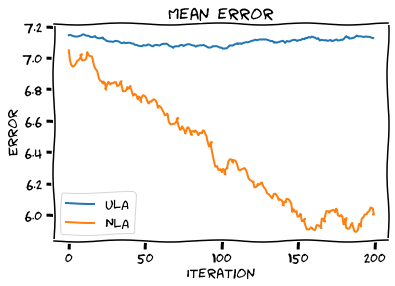

In [5]:
# plot comparison (mean)

%pylab inline

plt.xkcd() 
plt.plot(mean_err, label='ULA')
plt.plot(mean_err_newton, label='NLA')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.title('Mean error')


Text(0.5, 1.0, 'Covariance error')

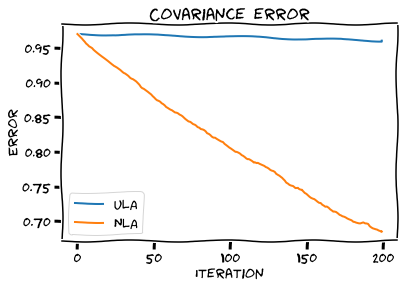

In [6]:
# plot comparison (covariance)

plt.plot(covariance_err, label='ULA')
plt.plot(covariance_err_newton, label='NLA')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.title('Covariance error')
